# Informação Auxiliar

## Links com informação  

**Notebooks gerais com apresentação de diferentes técnicas:**
- Geographical Datacience notebook (2023): https://geographicdata.science/book/intro.html
- Geographic Data Science, formação University of Liverpool (Dr. Dani Arribas-Bel): https://darribas.org/gds_course/content/home.html
- Spatial Data Science with PyData (University Bristol e University California), tem partes de metodos geoestatisticos: https://github.com/ljwolf/geopython/blob/master/sds1-geography_as_feature.ipynb

**Lista de Links alguns metódos referidos:**
- [Exploratory Analysis of Spatial Data: Spatial Autocorrelation](https://pysal.org/notebooks/explore/esda/Spatial_Autocorrelation_for_Areal_Unit_Data.html)
- [Geosilhouettes: geographical measures of cluster fit](https://pysal.org/notebooks/explore/esda/geosilhouettes.html)
- [Planar Point Patterns in PySAL](https://pysal.org/notebooks/explore/pointpats/pointpattern.html)
- [Basic Point Patterns](https://github.com/pysal/pointpats/blob/main/notebooks/pointpattern.ipynb)
- [Autocorrelação espacial — Utilizando o PySAL](https://marcospaulomoretti.medium.com/autocorrela%C3%A7%C3%A3o-espacial-utilizando-o-pysal-65f39d3cd424)
- [Centrography notebook](https://pysal.org/notebooks/explore/pointpats/centrography.html)
- [Descrição 3 tipos de Point Patterns](https://pysal.org/notebooks/explore/pointpats/process.html#Introduction)
- [Point e Area clustering (notebook basico)](https://github.com/ljwolf/geopython/blob/master/sds5-clustering.ipynb)
- [Spatial Autocorrelation Notebook](https://github.com/ljwolf/geopython/blob/master/sds3-esda.ipynb)
- [Exploratory spatial data analysis with Python (US Census Data)](https://walker-data.com/posts/esda-with-python/?ref=sangkon.com)
- [Clustering with Kmeans(code and theory included)](https://pub.aimind.so/clustering-with-kmeans-code-anf-theory-included-d65527316bde)
- [Finding Patterns in Convenience Store Locations with Geospatial Association Rule Mining](https://towardsdatascience.com/finding-patterns-in-convenience-store-locations-with-geospatial-association-rule-mining-5bad7e833299)
- [Inverse Distance Weighting Interpolation in Python](https://pareekshithkatti.medium.com/inverse-distance-weighting-interpolation-in-python-68351fb612d2)




## Resumo Metódos (Funcionalidades a Integrar na IIT-INE)

Descrição pelo Prof Paulo Morgado do IGOT


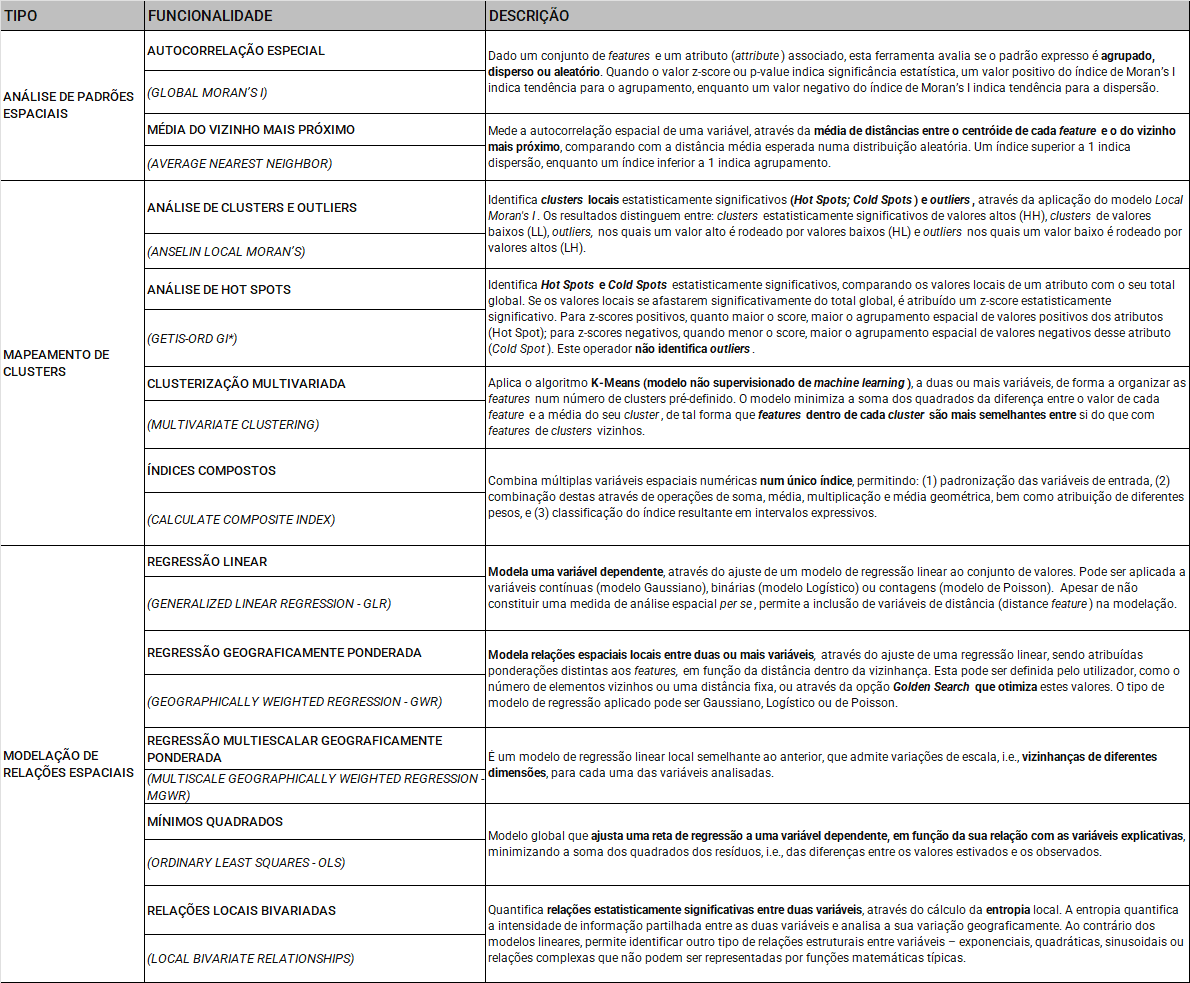


# Autocorrelação Espacial


## Objectivos

**Calcular medidas:**
- Moran Global
- Moran Local
- Getis and Ord’s local statistics

**Adaptação do Notebook**: https://geographicdata.science/book/notebooks/07_local_autocorrelation.html

Este notebook focou-se na análise dos votos para o referendo do BREXIT


## Importar Bibliotecas

In [ ]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn as sns  # Graphics
import geopandas as gpd # Spatial data manipulation
import pandas as pd  # Tabular data manipulation
# Para Evitar Aviso Point Patterns
from shapely.geometry import Point

# Bibliotecas pysal
import pysal.lib # importação geral
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles

# Bibliotecas última parte notebook exemplo
#import rioxarray  # Surface data manipulation
#import xarray  # Surface data manipulation




## Importar e Tratamento Dados BGRI2021 Lisboa

**Atenção**:
- Para estes notebooks são utilizados dados da BGRI2021 em Geopackage
- Estes dados facilmente podem ser obtidos no link: https://mapas.ine.pt/download/index2021.phtml


### Importar Geografia de um GeoPackage

_Importar dados do GeoPackage com variáveis do C2021 da BGRI2021_

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Caminho para o arquivo GeoPackage
gpk = r'C:\TEMP\BGRI2021_1106.gpkg'

# Ler os dados do GeoPackage para um GeoDataFrame
gdf1106 = gpd.read_file(gpk)

# Simplificar a geografia para uma precisão de 5 metros
gdf1106['geometry'] = gdf1106['geometry'].simplify(tolerance=5)

# Visualizar o GeoDataFrame
gdf1106.plot(column = 'DTMNFR21',
              legend = False)

### Calcular Atributos de Análise - população com mais de 65 anos (e outros)


_Adicionar alguns atributos que permitem fazer uma análise _  

In [ ]:
# Calcular Novo Atributo Racio de População 65+ anos
gdf1106['IND65'] = gdf1106.N_INDIVIDUOS_65_OU_MAIS/gdf1106.N_INDIVIDUOS

# Calcular Outros Atributos de interesse para Analisar: , N_EDIFICIOS_3_OU_MAIS_PISOS, N_INDIVIDUOS_H, N_INDIVIDUOS_M
gdf1106['IND14'] = gdf1106.N_INDIVIDUOS_0_14/gdf1106.N_INDIVIDUOS
gdf1106['IND_H'] = gdf1106.N_INDIVIDUOS_H/gdf1106.N_INDIVIDUOS
gdf1106['IND_M'] = gdf1106.N_INDIVIDUOS_M/gdf1106.N_INDIVIDUOS
gdf1106['EDIF_3PISOS'] = gdf1106.N_EDIFICIOS_3_OU_MAIS_PISOS/gdf1106.N_EDIFICIOS_CLASSICOS


# Mostrar Dados
print(gdf1106[['BGRI2021', 'DTMNFR21', 'N_INDIVIDUOS_65_OU_MAIS', 'N_INDIVIDUOS', 'IND65', 'IND14', 'IND_H', 'IND_M','EDIF_3PISOS']].head(10))


# Manter apenas as colunas de interesse: (não é necessário - simplifica o GeoDataFrame)
manter_colunas = ['geometry','BGRI2021', 'DTMNFR21', 'N_INDIVIDUOS_65_OU_MAIS', 'N_INDIVIDUOS', 'IND65','IND14', 'IND_H', 'IND_M','N_EDIFICIOS_CLASSICOS','EDIF_3PISOS']
gdf1106 = gdf1106.loc[:, manter_colunas]

print(gdf1106.info())

### Tratamento NaN 

In [ ]:
# Contar o número total de NaNs no DataFrame
total_nans = gdf1106.isna().sum().sum()
print('Número total de registros com NaN:', total_nans)

# Contar o número de NaNs em cada coluna
nans_por_coluna = gdf1106.isna().sum()
print('Número de registros com NaN por coluna:\n', nans_por_coluna)

# Corrigir NaN
# Existem 2 possibilidades
# 1. Deixar fora
#gdf1106 = gdf1106.dropna()
# 2. Substituir por outros valores
gdf1106 = gdf1106.fillna(0)



### Visualização Inicial
- Visualização de distribuição da variável com 6 classes
- Adicionar um basemap com contextily

In [ ]:
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Build choropleth
gdf1106.plot(
    column="IND65",
    cmap="viridis",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Add basemap
contextily.add_basemap(
    ax,
    crs=gdf1106.crs,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)
# Remove axes
ax.set_axis_off();

## Calcular Matriz de Vizinhança e Moran Global 

Mais informação com exemplos sobre spatial Weigts: https://geographicdata.science/book/notebooks/04_spatial_weights.html

**Queen**
~~~
f we wanted them to be considered as neighbours, we can switch to the more inclusive notion of Queen contiguity, which requires the pair of polygons to only share one or more vertices. We can create the neighbor relations for this same configuration as follows:
~~~
**KNN**
~~~
The first type of distance based weights defines the neighbor set of a particular observation as containing its nearest 
 observations, where the user specifies the value of 
. To illustrate this for the San Diego tracts, we take 
. This still leaves the issue of how to measure the distance between these polygon objects, however. To do so we develop a representative point for each of the polygons using the centroid.
~~~


In [ ]:
from pysal.model import spreg

# Input gdf1106 (BGRI de Lisboa)

# Calcular a matriz de pesos espaciais
# Metodo Original: 0.13069266093679838 e Valor-p: 0.001
w = pysal.lib.weights.Queen.from_dataframe(gdf1106, use_index=True)
# Metodo knn (I de Moran: 0.11720923169446687; Valor-p: 0.001)
#w = pysal.lib.weights.KNN.from_dataframe(gdf1106, k=5)

# Lidar com ilhas
# Normalizar a matriz de pesos
# Row-standardization 
w.transform = "r"

# Corrigir para ilhas
#w.set_transform('r')
islands = w.islands
if islands:
    for island in islands:
        w.neighbors[island] = [island]
        w.weights[island] = [1]



In [ ]:
# Selecionar a coluna com a percentagem de população superior a 65 anos
data = gdf1106['IND65']

# Calcular a estatística de Moran
moran = esda.Moran(data, w)

# Imprimir o valor I de Moran e o valor-p
print('I de Moran:', moran.I)
print('Valor-p:', moran.p_sim)

# Plotar o gráfico de dispersão de Moran (desatividado - vai ser efetuado em tarefas na próxima seção)
#plot_moran(moran, zstandard=True, fill=True, figsize=(10,4))

### Interpretação do Valor Moran Global
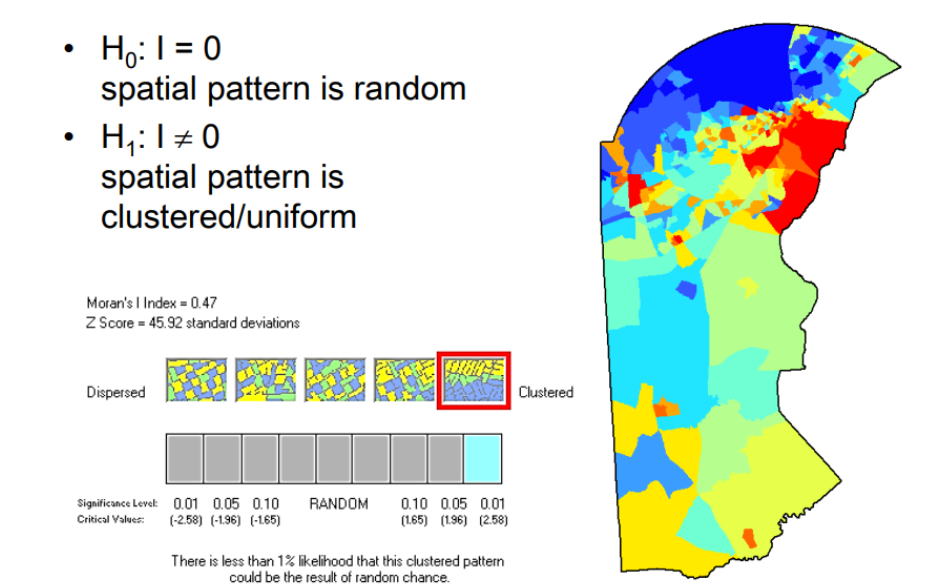




## Motivating local spatial autocorrelation (Moran Plot)

Nesta Parte é efetuado o seguinte:  
- Calcular o Spatial Lag
- Calcular as versões centradas
- Criar um Scatterplot
- Visualizar a distribuição dos valores em relação ao médio e aos valores nos polígonos vizinhos

Utiliza-se a função para calcular o Spatial Lag (que utiliza a matriz de vizinhança):  https://pysal.org/libpysal/generated/libpysal.weights.lag_spatial.html


**Moran Plot**
~~~
The Moran Plot is a way of visualizing a spatial dataset to explore the nature and strength of spatial autocorrelation. It is essentially a traditional scatter plot in which the variable of interest is displayed against its spatial lag. In order to be able to interpret values as above or below the mean, the variable of interest is usually standardized by subtracting its mean:
~~~


### Calcular o Spatial Lag

~~~
The spatial lag operator is one of the most common and direct applications of spatial weights matrices (called 
 formally) in spatial analysis. The mathematical definition is the product of 
 and the vector of a given variable. Conceptually, the spatial lag captures the behavior of a variable in the immediate surroundings of each location; in that respect, it is akin to a local smoother of a variable.
~~~

Função: https://pysal.org/libpysal/generated/libpysal.weights.lag_spatial.html


In [ ]:
# Calcular o Spatial Lag
# 
gdf1106["w_IND65"] = weights.lag_spatial(w, gdf1106['IND65'])

# And their respective centered versions, where we subtract the average off of every value
gdf1106["IND65_std"] = gdf1106["IND65"] - gdf1106["IND65"].mean()
gdf1106["w_IND65_std"] = weights.lag_spatial(w, gdf1106['IND65_std'])

In [ ]:
# Visualizar Valores em Cima e Baixo do Médio
# Set up the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values

sns.regplot(
    x="IND65_std", y="w_IND65_std", data=gdf1106, ci=None
)
plt.show()

### Figura com a relação das vizinhanças (Moran Plot)

**Mesma figura com indicação dos 4 quadrantos**

- LH: Valores na subsecção em baixo do médio, valores circundantes em cima do médio
- HH: Valores na subsecção em cima do médio, valores circundantes em cima do médio
- LL: Valores na subsecção em baixo do médio, valores circundantes em baixo do médio
- HL: Valores na subsecção em cima do médio, valores circundantes em baixo do médio


~~~
The Moran Plot is an excellent tool to explore the data and get a good sense of how much values are clustered over space. However, because it is a graphical device, it is sometimes hard to condense its insights into a more concise way. For these cases, a good approach is to come up with a statistical measure that summarizes the figure. This is exactly what Moran’s I, as formally expressed above, is meant to do.

~~~


In [ ]:
# Criar os Quadrantos
# Set up the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
sns.regplot(
    x="IND65_std", y="w_IND65_std", data=gdf1106, ci=None
)

# Esta Parte demora muito tempo

# Add vertical and horizontal lines (definição valor onde adicionar)
plt.axvline(0, c="k", alpha=0.5)
plt.axhline(0, c="k", alpha=0.5)

# Adicionar Text para Cada Quadrant - coordinados Text tendo em conta a distribuição dos dados
plt.text(0.6, 0.20, "HH", fontsize=25, c="r")
plt.text(0.6, -0.15, "HL", fontsize=25, c="r")
plt.text(-0.2, 0.20, "LH", fontsize=25, c="r")
plt.text(-0.15, -0.15, "LL", fontsize=25, c="r")

# Displaby
plt.show()

## Local Moran’s  I 


**Conteúdo**

- Calcular o Local Moran para cada subsecção
    - Função: https://pysal.org/esda/generated/esda.Moran_Local.html
- Visualização incial com função (LISA Cluster map): https://splot.readthedocs.io/en/latest/generated/splot.esda.lisa_cluster.html
    - LISA: Local Indicators of Spatial Association
- Kernel Density estimate plotting
- Fazer 4 representações 
    1. Valor LISA cada polígono (valor lisa.Is)
    2. Valor do quadrante cada área (esdaplot.lisa_cluster, p = 1)
    3. Indicação da significância estatística (lisa.p_sim < 0.05)
    4. Combinação dos anterior 2 (esdaplot.lisa_cluster, p = 0.05)



### Calcular LISA (Local Indicators of Spatial Association) e Visualização Inicial 

~~~
LISAs are widely used in many fields to identify geographical clusters of values or find geographical outliers. They are a useful tool that can quickly return areas in which values are concentrated and provide suggestive evidence about the processes that might be at work. For these reasons, they have a prime place in the geographic data science toolbox. 

~~~


In [ ]:
# https://pysal.org/esda/generated/esda.Moran_Local.html
# lisa = moran_loc
# Diferença com Notebook da Formação - dá erro porque os valores são NaN
from splot.esda import lisa_cluster
# data = 
lisa = esda.moran.Moran_Local(gdf1106['IND65'], w)

# Plotar o mapa de clusters de Moran
lisa_cluster(lisa, gdf1106, figsize=(9,9))

### Kernel Estimate Plotting

~~~
Continuing the comparison, we can think of the mean as a single numerical value summarizing a histogram or a kernel density plot.
~~~

In [ ]:
import numpy as np

# Valores LISa primeiros 10 registos
print(lisa.Is[:10])

# alguns indacores dos valores
print(f'''Minimum: {np.min(lisa.Is)}
Maximum: {np.max(lisa.Is)}
STD: {np.std(lisa.Is)}''')



In [ ]:
import warnings

# Nao mostrar aviso FutereWarning (não aconselhável)
warnings.filterwarnings("ignore", category=FutureWarning)

# Draw KDE line
ax = sns.kdeplot(lisa.Is)

# Add one small bar (rug) for each observation
# along horizontal axis
sns.rugplot(lisa.Is, ax=ax);

### Visualização diferentes Mapas com medidas LISA 

Significado dos 4 mapas:
1. Valor LISA cada polígono (valor lisa.Is)
2. Valor do quadrante cada área (esdaplot.lisa_cluster, p = 1)
3. Indicação da significância estatística (lisa.p_sim < 0.05)
4. Combinação dos anterior 2 (esdaplot.lisa_cluster, p = 0.05)

In [ ]:
from splot import esda as esdaplot


# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
# Grab first axis in the figure
ax = axs[0]
# Assign new column with local statistics on-the-fly
gdf1106.assign(
    Is=lisa.Is
    # Plot choropleth of local statistics
).plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Subplot 2 #
# Quadrant categories
# Grab second axis of local statistics
ax = axs[1]
# Plot Quadrant colors (note to ensure all polygons are assigned a
# quadrant, we "trick" the function by setting significance level to
# 1 so all observations are treated as "significant" and thus assigned
# a quadrant color
esdaplot.lisa_cluster(lisa, gdf1106, p=1, ax=ax)

# Subplot 3 #
# Significance map
# Grab third axis of local statistics
ax = axs[2]
#
# Find out significant observations
labels = pd.Series(
    1 * (lisa.p_sim < 0.05),  # Assign 1 if significant, 0 otherwise
    index=gdf1106.index  # Use the index in the original data
    # Recode 1 to "Significant and 0 to "Non-significant"
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `gdf1106` on the fly
gdf1106.assign(
    cl=labels
    # Plot choropleth of (non-)significant areas
).plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)


# Subplot 4 #
# Cluster map
# Grab second axis of local statistics
ax = axs[3]
# Plot Quadrant colors In this case, we use a 5% significance
# level to select polygons as part of statistically significant
# clusters
esdaplot.lisa_cluster(lisa, gdf1106, p=0.05, ax=ax)

# Figure styling #
# Set title to each subplot
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )
# Tight layout to minimize in-between white space
f.tight_layout()

# Display the figure
plt.show()

### Diferentes Contagens (Atributo 'q')
- Atributo 'q' do Moran Local mostra os valores nos 4 quadrantos

~~~
The correspondence between the numbers in the q attribute and the actual quadrants is as follows:
1 represents observations in the HH quadrant, 
2 those in the LH one, 
3 in the LL region, and 
4 in the HL quadrant. 
Comparing the two maps in the top row reveals 
that the positive local association in Scotland is due to low support for Brexit, 
while the positive local association in the south is among local authorities that strongly support Brexit.

~~~



In [ ]:
# Criar pd.series do resultado
counts = pd.Series(lisa.q).value_counts() # Original: pd.value_counts(lisa.q)
counts

In [ ]:
# Visualizar os valores do primeiros 10 registos 

lisa.q[:10]

In [ ]:
# Visualizar o numero de áreas com valores estatitisticamente significante

(lisa.p_sim < 0.05).sum() * 100 / len(lisa.p_sim)

## Getis and Ord’s local statistics

**Outras medidas para representar a autocorrelação espacial (Getis and Ord’s)**
- the G<sup>i</sup>: statistic, which omits the value at a site in its local summary
- the G<sup>i*</sup>: statistic, which includes the site’s own value in the local summary    

Função: https://pysal.org/esda/generated/esda.G_Local.html


### Calcular Inidcadores

In [ ]:
# Gi
go_i = esda.getisord.G_Local(gdf1106["IND65"], w) # , star=None
# Gi*
go_i_star = esda.getisord.G_Local(gdf1106["IND65"], w, star=True)

### Visualizar o Resultado

- Não existe nenhuma função para visualizar os resultados
- Criar uma função, após visualizar os valores


~~~
Like all local statistics, it is best to explore Getis and Ord statistics by plotting them on a map. Unlike with LISA though, the 
 statistics only allow to identify positive spatial autocorrelation. When standardized, positive values imply clustering of high values, while negative implies grouping of low values. Unfortunately, it is not possible to discern spatial outliers.

~~~


In [ ]:
def g_map(g, db, ax, title):
    """
    Create a cluster map
    ...

    Arguments
    ---------
    g      : G_Local
             Object from the computation of the G statistic
    db     : GeoDataFrame
             Table aligned with values in `g` and containing
             the geometries to plot
    ax     : AxesSubplot
             `matplotlib` axis to draw the map on

    Returns
    -------
    ax     : AxesSubplot
             Axis with the map drawn
    """
    ec = "0.8"

    # Break observations into significant or not
    sig = g.p_sim < 0.05

    # Plot non-significant clusters
    ns = db.loc[sig == False, "geometry"]
    ns.plot(ax=ax, color="lightgrey", edgecolor=ec, linewidth=0.1)
    # Plot HH clusters
    hh = db.loc[(g.Zs > 0) & (sig == True), "geometry"]
    hh.plot(ax=ax, color="red", edgecolor=ec, linewidth=0.1)
    # Plot LL clusters
    ll = db.loc[(g.Zs < 0) & (sig == True), "geometry"]
    ll.plot(ax=ax, color="blue", edgecolor=ec, linewidth=0.1)
    # Style and draw
    contextily.add_basemap(
        ax,
        crs=db.crs,
        source=contextily.providers.Esri.WorldTerrain,
    )
    # Flag to add a star to the title if it's G_i*
    st = ""
    if g.star:
        st = "*"
    # Add title
    ax.set_title(f"G{st} statistic {title}", size=15)
    # Remove axis for aesthetics
    ax.set_axis_off()
    return ax

In [ ]:
# Set up figure and axes
f, axs = plt.subplots(1, 2, figsize=(12, 6))
# Loop over the two statistics
for g, ax in zip([go_i, go_i_star], axs.flatten()):
    # Generate the statistic's map
    ax = g_map(g, gdf1106, ax, 'Rácio Popuação 65+ Anos')
# Tight layout to minimise blank spaces
f.tight_layout()
# Render
plt.show()

## Exercicio

**Repetir o código com outras variáveis e\ou com município de Porto ou outro município

- Utilizar o codigo Anterior para Calcular para outras variaveis
    - Lista variáveis: 'IND65','IND14', 'IND_H', 'IND_M','EDIF_3PISOS'
- Repete a mesma análise para outro municipio
    - Faz download do gpk de um municipio no link: https://mapas.ine.pt/download/index2021.phtml

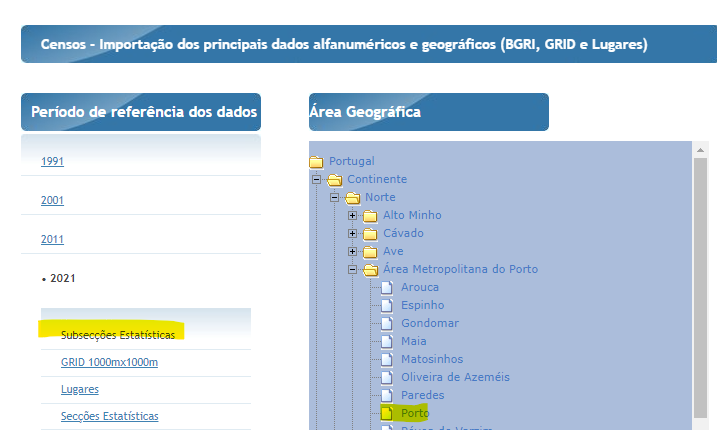


# Clustering e Regionalization

Adaptação do Notebook: https://geographicdata.science/book/notebooks/10_clustering_and_regionalization.html


In [ ]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn as sns  # Graphics
import geopandas as gpd # Spatial data manipulation
import pandas as pd  # Tabular data manipulation
import numpy as np

# Para Evitar Aviso Point Patterns
from shapely.geometry import Point
import contextily  # Background tiles

# Bibliotecas Referidos no Notebook
from esda.moran import Moran
from libpysal.weights import Queen, KNN
#import pysal.lib # importação geral
from pysal.explore import esda  # Exploratory Spatial analytics
from pysal.lib import weights  # Spatial weights



## Preparação dos Dados

### Importar Dados Lisboa

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Caminho para o arquivo GeoPackage
gpk = r'C:\TEMP\BGRI2021_1106.gpkg'

# Ler os dados do GeoPackage para um GeoDataFrame
gdf1106 = gpd.read_file(gpk)

# Simplificar a geografia para uma precisão de 5 metros
gdf1106['geometry'] = gdf1106['geometry'].simplify(tolerance=5)

# Visualizar o GeoDataFrame
gdf1106.plot(column = 'DTMNFR21',
              legend = False)



In [ ]:
# Nomes Atributos
gdf1106.info()

#### Lista Variáveis
~~~
Index 13 até 44:  
13: N_EDIFICIOS_CLASSICOS  
14: N_EDIFICIOS_CLASS_CONST_1_OU_2_ALOJ  
15: N_EDIFICIOS_CLASS_CONST_3_OU_MAIS_ALOJAMENTOS  
16: N_EDIFICIOS_EXCLUSIV_RESID  
17: N_EDIFICIOS_1_OU_2_PISOS  
18: N_EDIFICIOS_3_OU_MAIS_PISOS  
19: N_EDIFICIOS_CONSTR_ANTES_1945  
20: N_EDIFICIOS_CONSTR_1946_1980  
21: N_EDIFICIOS_CONSTR_1981_2000  
22: N_EDIFICIOS_CONSTR_2001_2010  
23: N_EDIFICIOS_CONSTR_2011_2021  
24: N_EDIFICIOS_COM_NECESSIDADES_REPARACAO  
25: N_ALOJAMENTOS_TOTAL  
26: N_ALOJAMENTOS_FAMILIARES  
27: N_ALOJAMENTOS_FAM_CLASS_RHABITUAL  
28: N_ALOJAMENTOS_FAM_CLASS_VAGOS_OU_RESID_SECUNDARIA  
29: N_RHABITUAL_ACESSIVEL_CADEIRAS_RODAS  
30: N_RHABITUAL_COM_ESTACIONAMENTO  
31: N_RHABITUAL_PROP_OCUP  
32: N_RHABITUAL_ARRENDADOS  
33: N_AGREGADOS_DOMESTICOS_PRIVADOS  
34: N_ADP_1_OU_2_PESSOAS  
35: N_ADP_3_OU_MAIS_PESSOAS  
36: N_NUCLEOS_FAMILIARES  
37: N_NUCLEOS_FAMILIARES_COM_FILHOS_TENDO_O_MAIS_NOVO_MENOS_DE_25  
38: N_INDIVIDUOS  
39: N_INDIVIDUOS_H  
40: N_INDIVIDUOS_M  
41: N_INDIVIDUOS_0_14  
42: N_INDIVIDUOS_15_24  
43: N_INDIVIDUOS_25_64  
44: N_INDIVIDUOS_65_OU_MAIS  
~~~

In [ ]:
# Incluir os nomes das variáveis que devem ser utilizados para criar os agrupamentos
cluster_variables = [
    gdf1106.columns[13],  # 
    gdf1106.columns[14],  # 
    gdf1106.columns[15],  # 
    gdf1106.columns[31],  # 
    gdf1106.columns[32],  # 
    gdf1106.columns[37],  # 
    gdf1106.columns[41],  # 
    gdf1106.columns[42],  # E
    gdf1106.columns[44] # 
]

In [ ]:
# Tratamento NaN
# Contar o número total de NaNs no DataFrame
total_nans = gdf1106.isna().sum().sum()
print('Número total de registros com NaN:', total_nans)

# Contar o número de NaNs em cada coluna
nans_por_coluna = gdf1106.isna().sum()
print('Número de registros com NaN por coluna:\n', nans_por_coluna)

# Preencher com valor 0
gdf1106 = gdf1106.fillna(0)

In [ ]:
# Mostrar como mapas temáticos os valores dos atributos escolhidos  

f, axs = plt.subplots(nrows=3, ncols=3, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()
# Start a loop over all the variables of interest
for i, col in enumerate(cluster_variables):
    # select the axis where the map will go
    ax = axs[i]
    # Plot the map
    gdf1106.plot(
        column=col,
        ax=ax,
        scheme="Quantiles",
        linewidth=0,
        cmap="RdPu",
    )
    # Remove axis clutter
    ax.set_axis_off()
    # Set the axis title to the name of variable being plotted
    ax.set_title(col)
# Display the figure
plt.show()

### Calcular Moran I para as variáveis

_O cálculo da matriz de vizinhança é uma parte importante. O metódo determina parcialmente os resultados obtidos_

In [ ]:
# Generate W from the GeoDataFrame
# w = weights.distance.KNN.from_dataframe(gdf1106, k=8)
# Metodo Alternativo:
w = weights.Queen.from_dataframe(gdf1106, use_index=True)


_Calcular o Moran I's para todas as variáveis escolhidas_

In [ ]:
# Set seed for reproducibility
np.random.seed(123456)
# Calculate Moran's I for each variable
mi_results = [
    Moran(gdf1106[variable], w) for variable in cluster_variables
]
# Structure results as a list of tuples
mi_results = [
    (variable, res.I, res.p_sim)
    for variable, res in zip(cluster_variables, mi_results)
]
# Display on table
table = pd.DataFrame(
    mi_results, columns=["Variable", "Moran's I", "P-value"]
).set_index("Variable")
table

--- 
~~~
Spatial autocorrelation only describes relationships between observations for a single attribute at a time. So, the fact that all of the clustering variables are positively autocorrelated does not say much about how attributes co-vary over space. To explore cross-attribute relationships, we need to consider the spatial correlation between variables. We will take our first dip in this direction exploring the bivariate correlation in the maps of covariates themselves. This would mean that we would be comparing each pair of choropleths to look for associations and differences. Given there are nine attributes, there are 36 pairs of maps that must be compared.

This would be too many maps to process visually. Instead, we focus directly on the bivariate relationships between each pair of attributes, devoid for now of geography, and use a scatterplot matrix 
~~~  
--- 

In [ ]:
# Utilizar kdeplot dá um aviso
import warnings

# Nao mostrar aviso FutereWarning (não aconselhável)
warnings.filterwarnings("ignore", category=FutureWarning)

# Mostrar kdeplot para cada variável
# _: Convenção Python que mostra que o resultado não está a ser utilizado

_ = sns.pairplot(
    gdf1106[cluster_variables], kind="reg", diag_kind="kde"
)

### Estandarizar Variaveis

--- 
~~~
Indeed, this kind of concentration in values is something you need to be very aware of in clustering contexts. Distances between datapoints are of paramount importance in clustering applications. In fact, (dis)similarity between observations is calculated as the statistical distance between themselves. Because distances are sensitive to the units of measurement, cluster solutions can change when you re-scale your data.
...
Therefore, as a rule, we standardize our data when clustering. There are many different methods of standardization offered in the sklearn.preprocessing module, and these map onto the main methods common in applied work. 

~~~

--- 

In [ ]:
# The distance between observations in terms of these variates can be computed easily using
from sklearn import metrics
metrics.pairwise_distances(
    gdf1106[[cluster_variables[0], cluster_variables[5]]].head()
).round(4)




--- 
~~~
In most clustering problems, the robust_scale() or scale() methods are useful. Further, transformations of the variate (such as log-transforming or Box-Cox transforms) can be used to non-linearly rescale the variates, but these generally should be done before the above kinds of scaling. Here, we will analyze robust-scaled variables. To detach the scaling from the analysis, we will perform the former now, creating a scaled view of our data which we can use later for clustering. For this, we import the scaling method:

And create the db_scaled object which contains only the variables we are interested in, scaled
~~~

--- 

In [ ]:
from sklearn.preprocessing import robust_scale
# And create the db_scaled object which contains only the variables we are interested in, scaled:
db_scaled = robust_scale(gdf1106[cluster_variables])
print(type(db_scaled))

## Cluster GeoDemograficos

---
~~~
Geodemographic analysis is a form of multivariate clustering where the observations represent geographical areas [WB18]. The output of these clusterings is nearly always mapped. Altogether, these methods use multivariate clustering algorithms to construct a known number of clusters (k), where the number of clusters is typically much smaller than the number of observations to be clustered
~~~


---

### K-Means

---

~~~
K-means is probably the most widely used approach to cluster a dataset. The algorithm groups observations into a pre-specified number of clusters so that each observation is closer to the mean of its own cluster than it is to the mean of any other cluster. The k-means problem is solved by iterating between an assignment step and an update step
~~~

---


In [ ]:
# Initialize KMeans instance
from sklearn.cluster import KMeans


In [ ]:
# Initialize KMeans instance
# Definir n_init explicitemente
kmeans = KMeans(n_clusters=5,n_init=10)

~~~
Next, we set the seed for reproducibility and call the fit method to compute the algorithm specified in kmeans to our scaled data: 
~~~

In [ ]:
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k5cls = kmeans.fit(db_scaled)

In [ ]:
# Print first five labels
k5cls.labels_[:5]

### Visualização do Resultado
_Podemos visualizar os resultados obtidos_


In [ ]:
# Assign labels into a column
gdf1106["k5cls"] = k5cls.labels_
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
gdf1106.plot(
    column="k5cls", categorical=True, legend=True, linewidth=0, ax=ax,
    legend_kwds={'loc': 'upper left'}
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

### Análise dos Resultados obtidos

_Visualizar o nº de elementos por grupo_

In [ ]:
# Group data table by cluster label and count observations
k5sizes = gdf1106.groupby("k5cls").size()
k5sizes

_Obter a área de cada grupo (dissolve) utilizando o atributo SHAPE_Area_

In [ ]:
# Dissolve areas by Cluster, aggregate by summing,
# and keep column for area
areas = gdf1106.dissolve(by="k5cls", aggfunc="sum")["SHAPE_Area"]
areas

_Visualizar o nº de elementos vs a área de cada grupo_

In [ ]:
# Visualizar o nº de elementos vs a Área total

# Bind cluster figures in a single table
area_tracts = pd.DataFrame({"No. Tracts": k5sizes, "Area": areas})
# Convert raw values into percentages
area_tracts = area_tracts * 100 / area_tracts.sum()
# Bar plot
ax = area_tracts.plot.bar()
# Rename axes
ax.set_xlabel("Cluster labels")
ax.set_ylabel("Percentage by cluster");

--- 
**Criar um perfil de cada cluster, executamos as seguintes tarefas:**

1. Calcular os médios de cada variável
2. Arrumar (tidy up) os dados, assegurando que cada linha é uma observação e cada coluna é uma variável  
3. Visualizar a distribuição dos valores das variáveis por grupo

--- 

In [ ]:
# Criar os Perfis de cada Cluster em relação as variáveis de input
# Mostrar os médios das variáveis em cada cluster
# Group table by cluster label, keep the variables used
# for clustering, and obtain their mean
k5means = gdf1106.groupby("k5cls")[cluster_variables].mean()
# Transpose the table and print it rounding each value
# to three decimals
k5means.T.round(3)

In [ ]:

# Index db on cluster ID
tidy_db = gdf1106.set_index("k5cls")
# Keep only variables used for clustering
tidy_db = tidy_db[cluster_variables]
# Stack column names into a column, obtaining
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(
    columns={"level_1": "Attribute", 0: "Values"}
)
# Check out result
tidy_db.head()

In [ ]:
# hows the distribution of each cluster’s values for each variable. 
# This gives us the full distributional profile of each cluster:
# Scale fonts to make them more readable
sns.set(font_scale=1.5)
# Setup the facets
facets = sns.FacetGrid(
    data=tidy_db,
    col="Attribute",
    hue="k5cls",
    sharey=False,
    sharex=False,
    aspect=2,
    col_wrap=3,
)
# Build the plot from `sns.kdeplot`
_ = facets.map(sns.kdeplot, "Values", shade=True).add_legend()


## Hierarchical Clustering

~~~
Agglomerative clustering works by building a hierarchy of clustering solutions that starts with all singletons (each observation is a single cluster in itself) and ends with all observations assigned to the same cluster. These extremes are not very useful in themselves. But, in between, the hierarchy contains many distinct clustering solutions with varying levels of detail. The intuition behind the algorithm is also rather straightforward:

1. begin with everyone as part of its own cluster;

2. find the two closest observations based on a distance metric (e.g., Euclidean);

3. join them into a new cluster;

3. repeat steps (2) and (3) until reaching the degree of aggregation desired.

~~~

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Set seed for reproducibility
np.random.seed(0)
# Initialize the algorithm
model = AgglomerativeClustering(linkage="ward", n_clusters=5)
# Run clustering (input dataset é sempre o db_scaled com valores estandarizados)
model.fit(db_scaled)
# Assign labels to main data table
gdf1106["ward5"] = model.labels_

In [ ]:
ward5sizes = gdf1106.groupby("ward5").size()
ward5sizes

### Visualizar os Resultados

In [ ]:
# Index db on cluster ID
tidy_db = gdf1106.set_index("ward5")
# Keep only variables used for clustering
tidy_db = tidy_db[cluster_variables]
# Stack column names into a column, obtaining
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(
    columns={"level_1": "Attribute", 0: "Values"}
)
# Check out result
tidy_db.head()

In [ ]:
# Setup the facets
facets = sns.FacetGrid(
    data=tidy_db,
    col="Attribute",
    hue="ward5",
    sharey=False,
    sharex=False,
    aspect=2,
    col_wrap=3,
)
# Build the plot as a `sns.kdeplot`
facets.map(sns.kdeplot, "Values", shade=True).add_legend();

### Comparação dos 2 Resultados

In [ ]:
gdf1106["ward5"] = model.labels_
# Set up figure and ax
f, axs = plt.subplots(1, 2, figsize=(12, 6))

### K-Means ###
ax = axs[0]
# Plot unique values choropleth including
# a legend and with no boundary lines
gdf1106.plot(
    column="ward5",
    categorical=True,
    cmap="Set3",
    legend=True,
    linewidth=0,
    ax=ax,
    legend_kwds={'loc': 'upper left'}
)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title("K-Means solution ($k=5$)")

### AHC ###
ax = axs[1]
# Plot unique values choropleth including
# a legend and with no boundary lines
gdf1106.plot(
    column="k5cls",
    categorical=True,
    cmap="Set3",
    legend=True,
    linewidth=0,
    ax=ax,
    legend_kwds={'loc': 'upper left'}
)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title("AHC solution ($k=5$)")

# Display the map
plt.show()

## Regionalization
--- 
~~~
Regionalization methods are clustering techniques that impose a spatial constraint on clusters. In other words, the result of a regionalization algorithm contains clusters with areas that are geographically coherent, in addition to having coherent data profiles. Effectively, this means that regionalization methods construct clusters that are all internally connected; these are the regions. Thus, a region’s members must be geographically nested within the region’s boundaries

In scikit-learn, this is done using our spatial weights matrix as a connectivity option. This parameter will force the agglomerative algorithm to only allow observations to be grouped in a cluster if they are also spatially connected:


~~~
---

Estes metódios são importantes quando queremos assegurar do que os elementos dos cluster tem uma ligação geográfica!


### Criar Novos Cluster

---
~~~
Depending on the algorithm, they also require the desired number of output regions. For illustration, we will take the AHC algorithm we have just used above and apply an additional spatial constraint. In scikit-learn, this is done using our spatial weights matrix as a connectivity option. This parameter will force the agglomerative algorithm to only allow observations to be grouped in a cluster if they are also spatially connected:
~~~

---

Diferenças anterior metodo:
- Incluir a matriz de vizinhança
- connectivity=w.sparse


In [ ]:
# Set the seed for reproducibility
np.random.seed(123456)
# Specify cluster model with spatial constraint
model = AgglomerativeClustering(
    linkage="ward", connectivity=w.sparse, n_clusters=5
)
# Fit algorithm to the data
model.fit(db_scaled)

### Visualizar o Resultado

In [ ]:
gdf1106["ward5wq"] = model.labels_
# Set up figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including a legend and with no boundary lines
gdf1106.plot(
    column="ward5wq",
    categorical=True,
    legend=True,
    linewidth=0,
    ax=ax,
    legend_kwds={'loc': 'upper left'}
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

# Guardar o mapa:
f.savefig(r"c:\temp\mapa_clusters1.png")

### Repetir o Processo com outra Matriz de Vizinhança

_A matriz de vizinhança tem grande influência no resultado obtido_


In [ ]:
# Generate W from the GeoDataFrame
w = weights.distance.KNN.from_dataframe(gdf1106, k=8)
# Metodo Alternativo:
#w = weights.Queen.from_dataframe(gdf1106, use_index=True)


# Outros Metodos

## Medida compactness
https://geographicdata.science/book/notebooks/10_clustering_and_regionalization.html#regionalization-spatially-constrained-hierarchical-clustering
- Link: 

~~~python
results = []
for cluster_type in ("k5cls", "ward5", "ward5wq", "ward5wknn"):
    # compute the region polygons using a dissolve
    regions = db[[cluster_type, "geometry"]].dissolve(by=cluster_type)
    # compute the actual isoperimetric quotient for these regions
    ipqs = (
        regions.area * 4 * numpy.pi / (regions.boundary.length ** 2)
    )
    # cast to a dataframe
    result = ipqs.to_frame(cluster_type)
    results.append(result)
# stack the series together along columns
pandas.concat(results, axis=1)

~~~~


In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

# gdf1106['IND65'] = gdf1106.N_INDIVIDUOS_65_OU_MAIS/gdf1106.N_INDIVIDUOS
gdf1106['compact'] = gdf1106.geometry.area * 4  * numpy.pi / (gdf1106.geometry.boundary.length ** 2)

# Definir Legenda 
lgnd_kwds = {'loc': 'upper left', 
             'bbox_to_anchor': (1, 1.03), 
             'ncol': 3}

# Generate the choropleth and store the axis
# natural_breaks
ax = gdf1106.plot(column='compact', 
                      scheme='quantiles', # natural_breaks, quantiles, equal_interval 
                      k=9, 
                      cmap='PuBu', 
                      legend=True,
                      edgecolor = 'None', # sem outline
                      legend_kwds  = lgnd_kwds)
 
# Remover frames, ticks e tick labels do axis
ax.set_axis_off()

plt.title('Compactness')
plt.show()

In [ ]:
print(gdf1106.head())


## Kriging com o Package pykrige

Existe exemplo na página https://geostat-framework.readthedocs.io/projects/pykrige/en/stable/examples/00_ordinary.html

Instalação pykrige: _**pip install pykrige**_ 

_Código foi corrigido em relação ao exemplo na página de ajuda_

In [ ]:
import numpy as np
from pykrige.ok import OrdinaryKriging
import pykrige.kriging_tools as kt
import matplotlib.pyplot as plt  

# Sample data points
data = np.array(
    [
        [0.3, 1.2, 0.5],
        [1.1, 3.2, 0.4],
        [1.8, 0.8, 0.6],
        [2.8, 2.6, 0.7],
        [3.2, 0.3, 0.8],
    ]
)  # [x, y, z]

# Define the grid to interpolate onto
gridx = np.arange(0.0, 4.1, 0.1)
gridy = np.arange(0.0, 4.1, 0.1)

# Create an Ordinary Kriging object
OK = OrdinaryKriging(
    data[:, 0],  # X coordinates
    data[:, 1],  # Y coordinates
    data[:, 2],  # Z values
    variogram_model="linear",  # Variogram model (can also use "gaussian" or "spherical")
    verbose=False,
    enable_plotting=True,  # Enable plotting of the variogram (optional)
)

# Execute Ordinary Kriging on the defined grid
# `z` contains the interpolated values
# `ss` contains the standard deviation at each grid point
z, ss = OK.execute("grid", gridx, gridy)

# Writes the kriged grid to an ASCII grid file and plot it.
kt.write_asc_grid(gridx, gridy, z, filename="c:\temp\output.asc")
plt.imshow(z)
plt.show()


